# H1: SmallVessel Density Differs by Genotype Across Tissue Regions

**Rationale:** SH2B3 loss-of-function (rs3184504 T allele) promotes endothelial progenitor cell mobilization and alters integrin signaling. The T allele may increase vascularization in white pulp structures where immune signaling is active.

**Analysis:** Vessel density (count/mm²) per region per image → compare across genotypes

> **Caveat:** With n=3–4 per group, these analyses are exploratory. Effect sizes are more informative than p-values.

In [1]:
import sys
sys.path.insert(0, '.')
from data_utils import *
setup_style()

df = load_data()
density = compute_density(df)
print(f"Images: {density['Image'].nunique()}, Regions: {density['Region'].nunique()}")
print(f"Samples per genotype: {density.groupby('Genotype', observed=True)['Sample'].nunique().to_dict()}")

Images: 10, Regions: 4
Samples per genotype: {'C/C': 3, 'C/T': 4, 'T/T': 3}


## Figure 1: Vessel Density by Region and Genotype (Raw + Normalized)

Saved: analysis/figures/H1_density_by_region_genotype.png


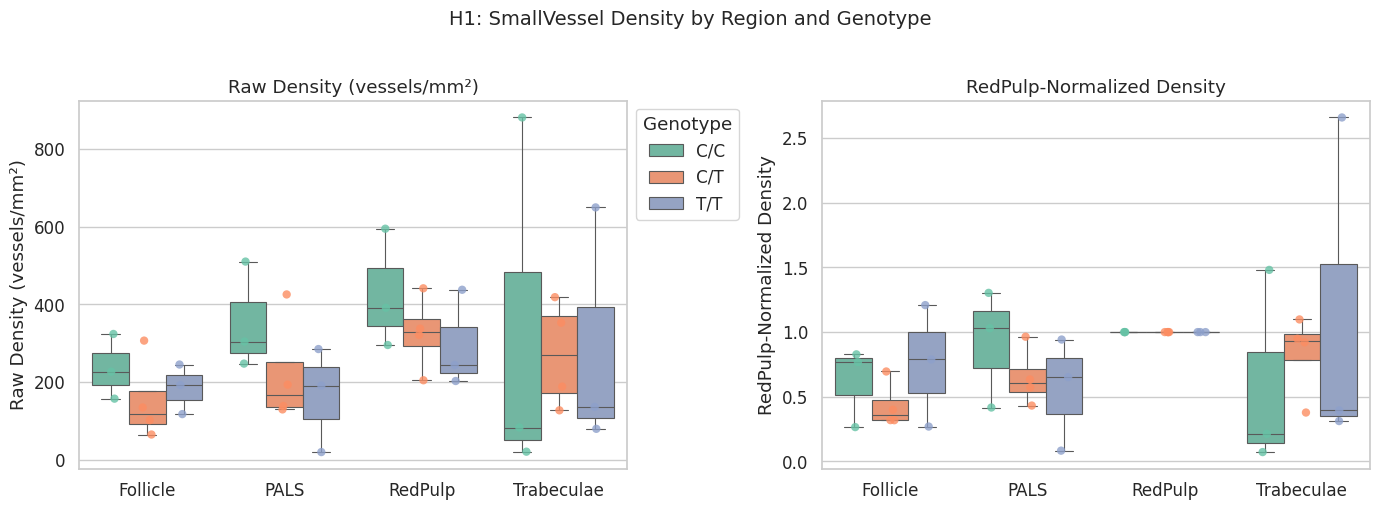

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

for ax, col, title in zip(axes,
    ['Density_per_mm2', 'Density_Normalized'],
    ['Raw Density (vessels/mm²)', 'RedPulp-Normalized Density']):
    plot_df = density[density['Region'].isin(MAIN_REGIONS)]
    sns.boxplot(data=plot_df, x='Region', y=col, hue='Genotype',
                order=MAIN_REGIONS, hue_order=GENO_ORDER, palette=GENO_PALETTE,
                ax=ax, linewidth=0.8, fliersize=0)
    sns.stripplot(data=plot_df, x='Region', y=col, hue='Genotype',
                  order=MAIN_REGIONS, hue_order=GENO_ORDER, palette=GENO_PALETTE,
                  dodge=True, ax=ax, size=6, alpha=0.8, legend=False)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel(title)
    if ax != axes[0]:
        ax.get_legend().remove()
    else:
        ax.legend(title='Genotype', bbox_to_anchor=(1, 1), loc='upper left')

fig.suptitle('H1: SmallVessel Density by Region and Genotype', fontsize=14, y=1.02)
fig.tight_layout()
save_figure(fig, 'H1_density_by_region_genotype')
plt.show()

## Figure 2: Per-Sample Density Heatmap

Saved: analysis/figures/H1_density_heatmap.png


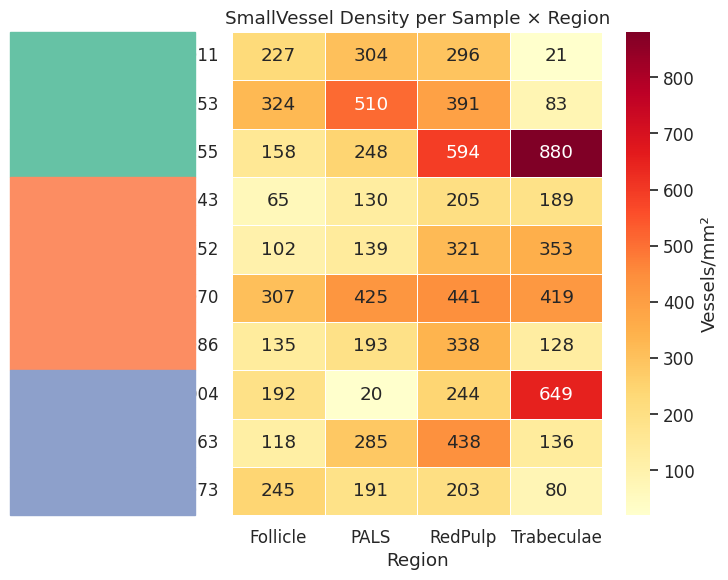

In [3]:
pivot = density[density['Region'].isin(MAIN_REGIONS)].pivot_table(
    index='Sample', columns='Region', values='Density_per_mm2'
)[MAIN_REGIONS]

# Sort by genotype then sample
sample_geno = density.drop_duplicates('Sample').set_index('Sample')['Genotype']
order = sample_geno.sort_values().index
pivot = pivot.loc[[s for s in order if s in pivot.index]]

# Add genotype labels
row_colors = pivot.index.map(lambda s: GENO_PALETTE[sample_geno[s]])

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax,
            linewidths=0.5, cbar_kws={'label': 'Vessels/mm²'})
ax.set_title('SmallVessel Density per Sample × Region')
ax.set_ylabel('')

# Genotype color strip on left
for i, sample in enumerate(pivot.index):
    geno = sample_geno[sample]
    ax.add_patch(plt.Rectangle((-0.6, i), 0.5, 1, color=GENO_PALETTE[geno],
                               clip_on=False, transform=ax.get_yaxis_transform()))

fig.tight_layout()
save_figure(fig, 'H1_density_heatmap')
plt.show()

## Figure 3: Follicle-Focused Density

/tmp/ipykernel_260080/838796808.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fol, x='Genotype', y=col, order=GENO_ORDER,
/tmp/ipykernel_260080/838796808.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=fol, x='Genotype', y=col, order=GENO_ORDER,
/tmp/ipykernel_260080/838796808.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fol, x='Genotype', y=col, order=GENO_ORDER,
/tmp/ipykernel_260080/838796808.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. A

Saved: analysis/figures/H1_follicle_density.png


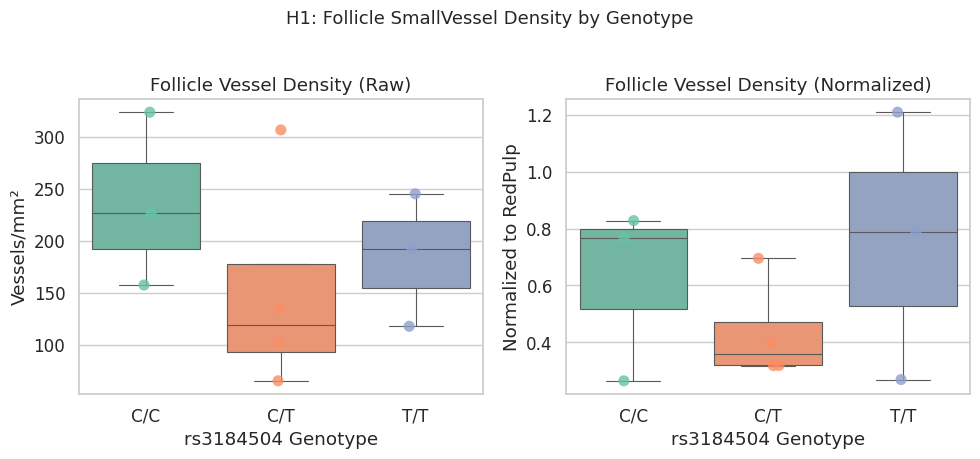

In [4]:
fol = density[density['Region'] == 'Follicle'].copy()

fig, axes = plt.subplots(1, 2, figsize=(10, 4.5))

for ax, col, ylabel in zip(axes,
    ['Density_per_mm2', 'Density_Normalized'],
    ['Vessels/mm²', 'Normalized to RedPulp']):
    sns.boxplot(data=fol, x='Genotype', y=col, order=GENO_ORDER,
                palette=GENO_PALETTE, ax=ax, linewidth=0.8, fliersize=0)
    sns.stripplot(data=fol, x='Genotype', y=col, order=GENO_ORDER,
                  palette=GENO_PALETTE, ax=ax, size=8, alpha=0.8)
    ax.set_ylabel(ylabel)
    ax.set_xlabel('rs3184504 Genotype')

axes[0].set_title('Follicle Vessel Density (Raw)')
axes[1].set_title('Follicle Vessel Density (Normalized)')
fig.suptitle('H1: Follicle SmallVessel Density by Genotype', fontsize=13, y=1.02)
fig.tight_layout()
save_figure(fig, 'H1_follicle_density')
plt.show()

## Figure 4: Gene Dosage Trend (Follicle)

/tmp/ipykernel_260080/4091287750.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = fol.groupby('Geno_Ordinal')['Density_per_mm2'].mean()


Saved: analysis/figures/H1_follicle_dosage_trend.png


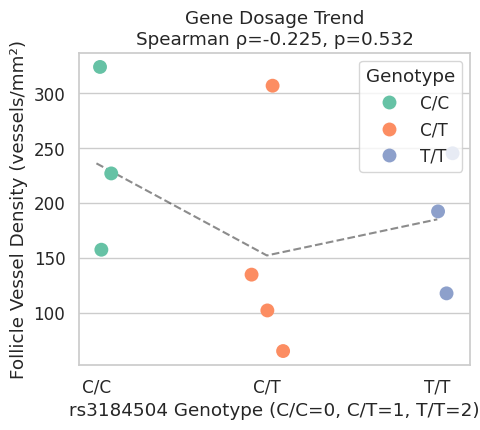

In [5]:
fol = density[density['Region'] == 'Follicle'].copy()
fol['Geno_Ordinal'] = fol['Genotype'].map({'C/C': 0, 'C/T': 1, 'T/T': 2})

rho, sp_p = run_dosage_trend(fol, 'Density_per_mm2')

fig, ax = plt.subplots(figsize=(5, 4.5))
sns.stripplot(data=fol, x='Geno_Ordinal', y='Density_per_mm2',
              hue='Genotype', hue_order=GENO_ORDER, palette=GENO_PALETTE,
              s=10, ax=ax)

# Trend line
means = fol.groupby('Geno_Ordinal')['Density_per_mm2'].mean()
ax.plot(means.index, means.values, 'k--', alpha=0.5, linewidth=1.5)

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(GENO_ORDER)
ax.set_xlabel('rs3184504 Genotype (C/C=0, C/T=1, T/T=2)')
ax.set_ylabel('Follicle Vessel Density (vessels/mm²)')
ax.set_title(f'Gene Dosage Trend\nSpearman ρ={rho:.3f}, p={sp_p:.3f}')
ax.legend(title='Genotype')

fig.tight_layout()
save_figure(fig, 'H1_follicle_dosage_trend')
plt.show()

## Summary Tables

In [6]:
# Summary statistics
summary = density[density['Region'].isin(MAIN_REGIONS)].groupby(
    ['Region', 'Genotype'], observed=True
)['Density_per_mm2'].agg(['count', 'mean', 'std', 'median']).round(1).reset_index()
summary.columns = ['Region', 'Genotype', 'N', 'Mean', 'SD', 'Median']

save_table(summary, 'H1_density_summary')
display(summary)

Saved: analysis/tables/H1_density_summary.csv


,Region,Genotype,N,Mean,SD,Median
0,Follicle,C/C,3,236.1,83.5,227.0
1,Follicle,C/T,4,152.4,106.8,118.6
2,Follicle,T/T,3,185.2,64.0,192.4
3,PALS,C/C,3,354.0,138.0,304.4
4,PALS,C/T,4,221.9,138.6,166.1
5,PALS,T/T,3,165.5,134.3,191.3
6,RedPulp,C/C,3,427.1,152.7,391.2
7,RedPulp,C/T,4,326.3,96.8,329.5
8,RedPulp,T/T,3,294.8,125.3,244.0
9,Trabeculae,C/C,3,328.4,479.1,83.4


In [7]:
# Full density data
full = density[density['Region'].isin(MAIN_REGIONS)][[
    'Sample', 'Genotype', 'Region', 'Vessel_Count', 'Region_Area_mm2',
    'Density_per_mm2', 'RedPulp_Density', 'Density_Normalized'
]].sort_values(['Region', 'Genotype', 'Sample']).round(2)

save_table(full, 'H1_density_full')
display(full)

Saved: analysis/tables/H1_density_full.csv


,Sample,Genotype,Region,Vessel_Count,Region_Area_mm2,Density_per_mm2,RedPulp_Density,Density_Normalized
4,HDL011,C/C,Follicle,985,4.34,226.98,295.51,0.77
16,HDL053,C/C,Follicle,10669,32.94,323.87,391.23,0.83
20,HDL055,C/C,Follicle,1299,8.24,157.58,594.44,0.27
8,HDL043,C/T,Follicle,1198,18.32,65.38,204.88,0.32
12,HDL052,C/T,Follicle,152,1.49,102.32,321.31,0.32
28,HDL070,C/T,Follicle,2673,8.71,306.80,441.25,0.70
36,HDL086,C/T,Follicle,2030,15.05,134.91,337.70,0.40
0,1901HBMP004,T/T,Follicle,801,4.16,192.44,244.04,0.79
24,HDL063,T/T,Follicle,1799,15.26,117.87,437.50,0.27
32,HDL073,T/T,Follicle,919,3.75,245.32,202.94,1.21


In [8]:
# Statistical tests per region
all_stats = []
for region in MAIN_REGIONS:
    rd = density[density['Region'] == region]
    for col, label in [('Density_per_mm2', f'{region} raw'),
                       ('Density_Normalized', f'{region} normalized')]:
        st = full_stats_table(rd, col, label=label)
        all_stats.append(st)

stats_df = pd.concat(all_stats, ignore_index=True)
save_table(stats_df, 'H1_statistical_tests')
display(stats_df)

Saved: analysis/tables/H1_statistical_tests.csv


/home/smith6jt/.local/lib/python3.12/site-packages/scipy/stats/_stats_py.py:8492: RuntimeWarning: invalid value encountered in scalar divide
  h /= ties
/home/smith6jt/SpleenFollicleCounterQP/analysis/data_utils.py:265: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(ordinal[valid], data.loc[valid, value_col])


,Test,Metric,Statistic,p,Effect_Size
0,Kruskal-Wallis,Follicle raw,2.090909,0.351532,
1,Mann-Whitney (C/C vs C/T),Follicle raw,10.000000,0.228571,r=-0.667
2,Mann-Whitney (C/C vs T/T),Follicle raw,6.000000,0.700000,r=-0.333
3,Mann-Whitney (C/T vs T/T),Follicle raw,4.000000,0.628571,r=0.333
4,Spearman dosage,Follicle raw,-0.224733,0.532481,rho=-0.225
5,Kruskal-Wallis,Follicle normalized,0.890909,0.640533,
6,Mann-Whitney (C/C vs C/T),Follicle normalized,8.000000,0.628571,r=-0.333
7,Mann-Whitney (C/C vs T/T),Follicle normalized,3.000000,0.700000,r=0.333
8,Mann-Whitney (C/T vs T/T),Follicle normalized,4.000000,0.628571,r=0.333
9,Spearman dosage,Follicle normalized,0.134840,0.710342,rho=0.135
